<a href="https://colab.research.google.com/github/PRIMEADAWAS/CEB_Assignment/blob/main/RADI605_A1_PasitSupholkhan_(Assignment_Adaboost).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RADI605_A1_PasitSupholkhan (Assignment: Adaboost)
Assignment: due date February 2, 2023 (20 points)  



## 1) Please select one dataset from a UCI (https://archive.ics.uci.edu/ml/index.php)

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
print('Pandas version :',pd.__version__)
print('Numpy version :',np.__version__)
print('Matplotlib version :',mpl.__version__)

Pandas version : 1.3.5
Numpy version : 1.21.6
Matplotlib version : 3.2.2


In [2]:
from sklearn.ensemble import AdaBoostClassifier


https://archive.ics.uci.edu/ml/datasets/Heart+failure+clinical+records

In [3]:
url = 'https://raw.githubusercontent.com/PRIMEADAWAS/CEB_Assignment/main/RADI%20605%20Modern%20Machine%20Learning/Adaboots/Adaptive%20Boosting%20Algorithm%20(AdaBoost)/CHF_death.csv'
df = pd.read_csv(url, sep=',')
df.sample(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
35,69.0,0,582,1,35,0,228000.00,3.50,134,1,0,30,1
88,44.0,0,84,1,40,1,235000.00,0.70,139,1,0,79,0
121,66.0,1,68,1,38,1,162000.00,1.00,136,0,0,95,0
197,65.0,0,167,0,30,0,259000.00,0.80,138,0,0,186,0
266,55.0,0,1199,0,20,0,263358.03,1.83,134,1,1,241,1


## 2) Describe the data characteristics by using appropriate statistical techniques.

Feature describe  
https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-1023-5/tables/1

<table class="data last-table"><thead class="c-article-table-head"><tr><th class="u-text-left ">
                        Feature
                      </th><th class="u-text-left ">
                        Explanation
                      </th><th class="u-text-left ">
                        Measurement
                      </th><th class="u-text-left ">
                        Range
                      </th></tr></thead><tbody><tr><td class="u-text-left ">
                        Age
                      </td><td class="u-text-left ">
                        Age of the patient
                      </td><td class="u-text-left ">
                        Years
                      </td><td class="u-text-left ">
                        [40,..., 95]
                      </td></tr><tr><td class="u-text-left ">
                        Anaemia
                      </td><td class="u-text-left ">
                        Decrease of red blood cells or hemoglobin
                      </td><td class="u-text-left ">
                        Boolean
                      </td><td class="u-text-left ">
                        0, 1
                      </td></tr><tr><td class="u-text-left ">
                        High blood pressure
                      </td><td class="u-text-left ">
                        If a patient has hypertension
                      </td><td class="u-text-left ">
                        Boolean
                      </td><td class="u-text-left ">
                        0, 1
                      </td></tr><tr><td class="u-text-left ">
                        Creatinine phosphokinase
                      </td><td class="u-text-left ">
                        Level of the CPK enzyme in the blood
                      </td><td class="u-text-left ">
                        mcg/L
                      </td><td class="u-text-left ">
                        [23,..., 7861]
                      </td></tr><tr><td class="u-text-left ">
                        (CPK)
                      </td><td class="u-text-left ">&nbsp;</td><td class="u-text-left ">&nbsp;</td><td class="u-text-left ">&nbsp;</td></tr><tr><td class="u-text-left ">
                        Diabetes
                      </td><td class="u-text-left ">
                        If the patient has diabetes
                      </td><td class="u-text-left ">
                        Boolean
                      </td><td class="u-text-left ">
                        0, 1
                      </td></tr><tr><td class="u-text-left ">
                        Ejection fraction
                      </td><td class="u-text-left ">
                        Percentage of blood leaving
                      </td><td class="u-text-left ">
                        Percentage
                      </td><td class="u-text-left ">
                        [14,..., 80]
                      </td></tr><tr><td class="u-text-left ">&nbsp;</td><td class="u-text-left ">
                        the heart at each contraction
                      </td><td class="u-text-left ">&nbsp;</td><td class="u-text-left ">&nbsp;</td></tr><tr><td class="u-text-left ">
                        Sex
                      </td><td class="u-text-left ">
                        Woman or man
                      </td><td class="u-text-left ">
                        Binary
                      </td><td class="u-text-left ">
                        0, 1
                      </td></tr><tr><td class="u-text-left ">
                        Platelets
                      </td><td class="u-text-left ">
                        Platelets in the blood
                      </td><td class="u-text-left ">
                        kiloplatelets/mL
                      </td><td class="u-text-left ">
                        [25.01,..., 850.00]
                      </td></tr><tr><td class="u-text-left ">
                        Serum creatinine
                      </td><td class="u-text-left ">
                        Level of creatinine in the blood
                      </td><td class="u-text-left ">
                        mg/dL
                      </td><td class="u-text-left ">
                        [0.50,..., 9.40]
                      </td></tr><tr><td class="u-text-left ">
                        Serum sodium
                      </td><td class="u-text-left ">
                        Level of sodium in the blood
                      </td><td class="u-text-left ">
                        mEq/L
                      </td><td class="u-text-left ">
                        [114,..., 148]
                      </td></tr><tr><td class="u-text-left ">
                        Smoking
                      </td><td class="u-text-left ">
                        If the patient smokes
                      </td><td class="u-text-left ">
                        Boolean
                      </td><td class="u-text-left ">
                        0, 1
                      </td></tr><tr><td class="u-text-left ">
                        Time
                      </td><td class="u-text-left ">
                        Follow-up period
                      </td><td class="u-text-left ">
                        Days
                      </td><td class="u-text-left ">
                        [4,...,285]
                      </td></tr><tr><td class="u-text-left ">
                        (target) death event
                      </td><td class="u-text-left ">
                        If the patient died during the follow-up period
                      </td><td class="u-text-left ">
                        Boolean
                      </td><td class="u-text-left ">
                        0, 1
                      </td></tr></tbody></table>

Category feature describe  
https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-1023-5/tables/2

<table class="data last-table"><thead class="c-article-table-head"><tr><th class="u-text-left ">&nbsp;</th><th class="u-text-left " colspan="2">
                        Full sample
                      </th><th class="u-text-left " colspan="2">
                        Dead patients
                      </th><th class="u-text-left " colspan="2">
                        Survived patients
                      </th></tr><tr><th class="u-text-left ">
                        Category feature
                      </th><th class="u-text-left ">
                        #
                      </th><th class="u-text-left ">
                        %
                      </th><th class="u-text-left ">
                        #
                      </th><th class="u-text-left ">
                        %
                      </th><th class="u-text-left ">
                        #
                      </th><th class="u-text-left ">
                        %
                      </th></tr></thead><tbody><tr><td class="u-text-left ">
                        Anaemia (0: false)
                      </td><td class="u-text-left ">
                        170
                      </td><td class="u-text-left ">
                        56.86
                      </td><td class="u-text-left ">
                        50
                      </td><td class="u-text-left ">
                        52.08
                      </td><td class="u-text-left ">
                        120
                      </td><td class="u-text-left ">
                        59.11
                      </td></tr><tr><td class="u-text-left ">
                        Anaemia (1: true)
                      </td><td class="u-text-left ">
                        129
                      </td><td class="u-text-left ">
                        43.14
                      </td><td class="u-text-left ">
                        46
                      </td><td class="u-text-left ">
                        47.92
                      </td><td class="u-text-left ">
                        3
                      </td><td class="u-text-left ">
                        40.89
                      </td></tr><tr><td class="u-text-left ">
                        High blood pressure (0: false)
                      </td><td class="u-text-left ">
                        194
                      </td><td class="u-text-left ">
                        64.88
                      </td><td class="u-text-left ">
                        57
                      </td><td class="u-text-left ">
                        59.38
                      </td><td class="u-text-left ">
                        137
                      </td><td class="u-text-left ">
                        67.49
                      </td></tr><tr><td class="u-text-left ">
                        High blood pressure (1: true)
                      </td><td class="u-text-left ">
                        105
                      </td><td class="u-text-left ">
                        35.12
                      </td><td class="u-text-left ">
                        39
                      </td><td class="u-text-left ">
                        40.62
                      </td><td class="u-text-left ">
                        66
                      </td><td class="u-text-left ">
                        32.51
                      </td></tr><tr><td class="u-text-left ">
                        Diabetes (0: false)
                      </td><td class="u-text-left ">
                        174
                      </td><td class="u-text-left ">
                        58.19
                      </td><td class="u-text-left ">
                        56
                      </td><td class="u-text-left ">
                        58.33
                      </td><td class="u-text-left ">
                        118
                      </td><td class="u-text-left ">
                        58.13
                      </td></tr><tr><td class="u-text-left ">
                        Diabetes (1: true)
                      </td><td class="u-text-left ">
                        125
                      </td><td class="u-text-left ">
                        41.81
                      </td><td class="u-text-left ">
                        40
                      </td><td class="u-text-left ">
                        41.67
                      </td><td class="u-text-left ">
                        85
                      </td><td class="u-text-left ">
                        41.87
                      </td></tr><tr><td class="u-text-left ">
                        Sex (0: woman)
                      </td><td class="u-text-left ">
                        105
                      </td><td class="u-text-left ">
                        35.12
                      </td><td class="u-text-left ">
                        34
                      </td><td class="u-text-left ">
                        35.42
                      </td><td class="u-text-left ">
                        71
                      </td><td class="u-text-left ">
                        34.98
                      </td></tr><tr><td class="u-text-left ">
                        Sex (1: man)
                      </td><td class="u-text-left ">
                        194
                      </td><td class="u-text-left ">
                        64.88
                      </td><td class="u-text-left ">
                        62
                      </td><td class="u-text-left ">
                        64.58
                      </td><td class="u-text-left ">
                        132
                      </td><td class="u-text-left ">
                        65.02
                      </td></tr><tr><td class="u-text-left ">
                        Smoking (0: false)
                      </td><td class="u-text-left ">
                        203
                      </td><td class="u-text-left ">
                        67.89
                      </td><td class="u-text-left ">
                        66
                      </td><td class="u-text-left ">
                        68.75
                      </td><td class="u-text-left ">
                        137
                      </td><td class="u-text-left ">
                        67.49
                      </td></tr><tr><td class="u-text-left ">
                        Smoking (1: true)
                      </td><td class="u-text-left ">
                        96
                      </td><td class="u-text-left ">
                        32.11
                      </td><td class="u-text-left ">
                        30
                      </td><td class="u-text-left ">
                        31.25
                      </td><td class="u-text-left ">
                        66
                      </td><td class="u-text-left ">
                        32.51
                      </td></tr></tbody></table>

Numerical feature describe  
https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-1023-5/tables/3

<table class="data last-table"><thead class="c-article-table-head"><tr><th class="u-text-left ">&nbsp;</th><th class="u-text-left " colspan="3">
                        Full sample
                      </th><th class="u-text-left " colspan="3">
                        Dead patients
                      </th><th class="u-text-left " colspan="3">
                        Survived patients
                      </th></tr><tr><th class="u-text-left ">
                        Numeric feature
                      </th><th class="u-text-left ">
                        Median
                      </th><th class="u-text-left ">
                        Mean
                      </th><th class="u-text-left ">
                        <i>σ</i>
                      </th><th class="u-text-left ">
                        Median
                      </th><th class="u-text-left ">
                        Mean
                      </th><th class="u-text-left ">
                        <i>σ</i>
                      </th><th class="u-text-left ">
                        Median
                      </th><th class="u-text-left ">
                        Mean
                      </th><th class="u-text-left ">
                        <i>σ</i>
                      </th></tr></thead><tbody><tr><td class="u-text-left ">
                        Age
                      </td><td class="u-text-left ">
                        60.00
                      </td><td class="u-text-left ">
                        60.83
                      </td><td class="u-text-left ">
                        11.89
                      </td><td class="u-text-left ">
                        65.00
                      </td><td class="u-text-left ">
                        65.22
                      </td><td class="u-text-left ">
                        13.21
                      </td><td class="u-text-left ">
                        60.00
                      </td><td class="u-text-left ">
                        58.76
                      </td><td class="u-text-left ">
                        10.64
                      </td></tr><tr><td class="u-text-left ">
                        Creatinine phosphokinase
                      </td><td class="u-text-left ">
                        250.00
                      </td><td class="u-text-left ">
                        581.80
                      </td><td class="u-text-left ">
                        970.29
                      </td><td class="u-text-left ">
                        259.00
                      </td><td class="u-text-left ">
                        670.20
                      </td><td class="u-text-left ">
                        1316.58
                      </td><td class="u-text-left ">
                        245.00
                      </td><td class="u-text-left ">
                        540.10
                      </td><td class="u-text-left ">
                        753.80
                      </td></tr><tr><td class="u-text-left ">
                        Ejection fraction
                      </td><td class="u-text-left ">
                        38.00
                      </td><td class="u-text-left ">
                        38.08
                      </td><td class="u-text-left ">
                        11.83
                      </td><td class="u-text-left ">
                        30.00
                      </td><td class="u-text-left ">
                        33.47
                      </td><td class="u-text-left ">
                        12.53
                      </td><td class="u-text-left ">
                        38.00
                      </td><td class="u-text-left ">
                        40.27
                      </td><td class="u-text-left ">
                        10.86
                      </td></tr><tr><td class="u-text-left ">
                        Platelets
                      </td><td class="u-text-left ">
                        262.00
                      </td><td class="u-text-left ">
                        263.36
                      </td><td class="u-text-left ">
                        97.80
                      </td><td class="u-text-left ">
                        258.50
                      </td><td class="u-text-left ">
                        256.38
                      </td><td class="u-text-left ">
                        98.53
                      </td><td class="u-text-left ">
                        263.00
                      </td><td class="u-text-left ">
                        266.66
                      </td><td class="u-text-left ">
                        97.53
                      </td></tr><tr><td class="u-text-left ">
                        Serum creatinine
                      </td><td class="u-text-left ">
                        1.10
                      </td><td class="u-text-left ">
                        1.39
                      </td><td class="u-text-left ">
                        1.03
                      </td><td class="u-text-left ">
                        1.30
                      </td><td class="u-text-left ">
                        1.84
                      </td><td class="u-text-left ">
                        1.47
                      </td><td class="u-text-left ">
                        1.00
                      </td><td class="u-text-left ">
                        1.19
                      </td><td class="u-text-left ">
                        0.65
                      </td></tr><tr><td class="u-text-left ">
                        Serum sodium
                      </td><td class="u-text-left ">
                        137.00
                      </td><td class="u-text-left ">
                        136.60
                      </td><td class="u-text-left ">
                        4.41
                      </td><td class="u-text-left ">
                        135.50
                      </td><td class="u-text-left ">
                        135.40
                      </td><td class="u-text-left ">
                        5.00
                      </td><td class="u-text-left ">
                        137.00
                      </td><td class="u-text-left ">
                        137.20
                      </td><td class="u-text-left ">
                        3.98
                      </td></tr><tr><td class="u-text-left ">
                        Time
                      </td><td class="u-text-left ">
                        115.00
                      </td><td class="u-text-left ">
                        130.30
                      </td><td class="u-text-left ">
                        77.61
                      </td><td class="u-text-left ">
                        44.50
                      </td><td class="u-text-left ">
                        70.89
                      </td><td class="u-text-left ">
                        62.38
                      </td><td class="u-text-left ">
                        172.00
                      </td><td class="u-text-left ">
                        158.30
                      </td><td class="u-text-left ">
                        67.74
                      </td></tr></tbody></table>

find null value

In [4]:
df.isnull().values.any()

False

In [5]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


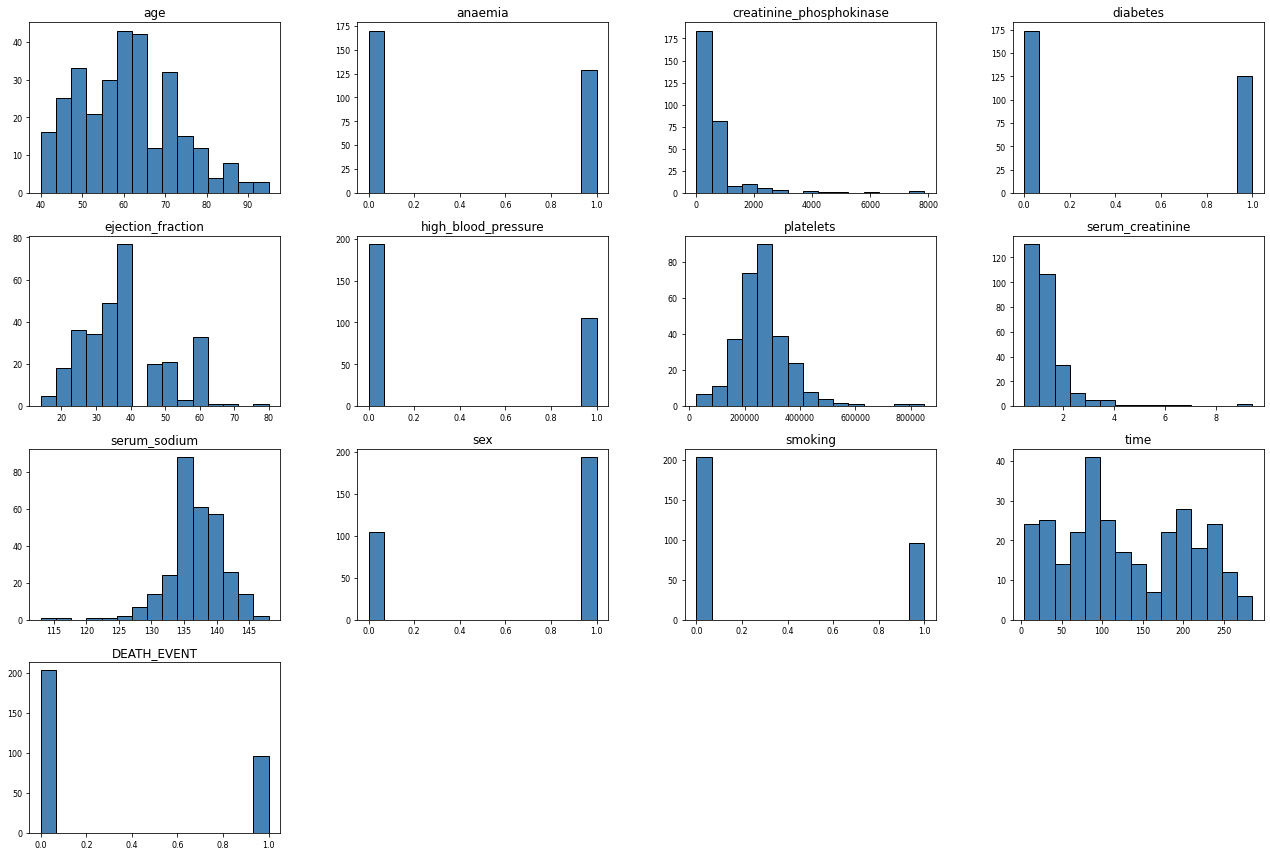

In [6]:
df.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 3, 3))

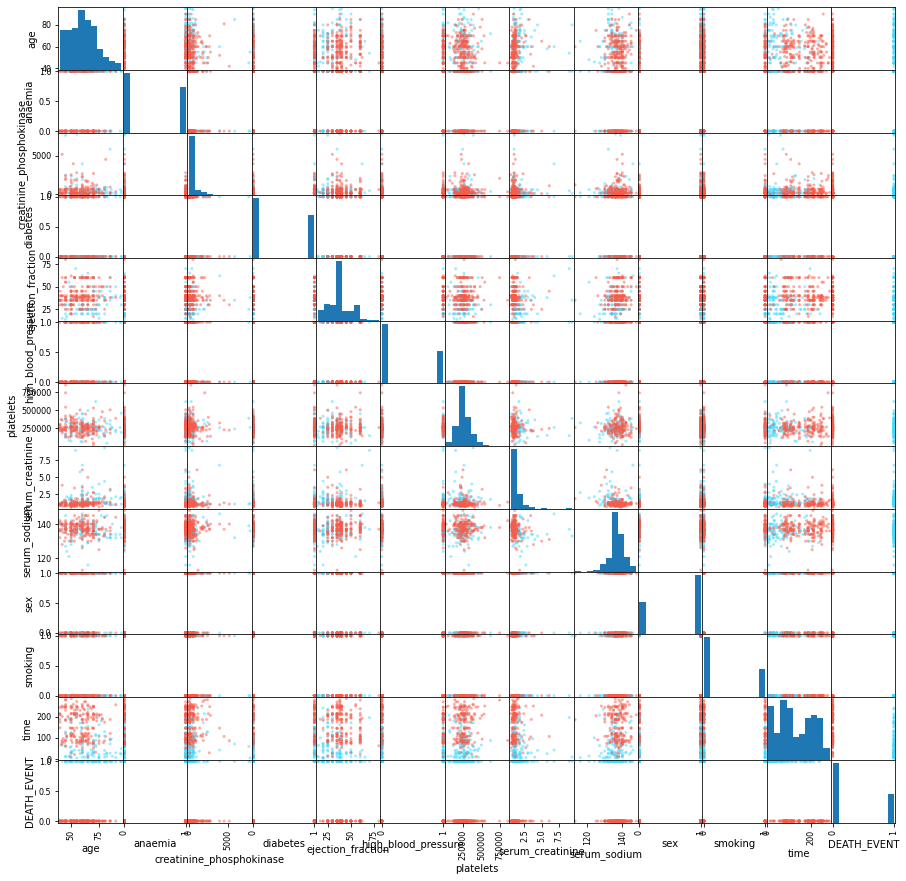

In [7]:
df2 = df.dropna()
colors = df2["DEATH_EVENT"].map(lambda x: "#44d9ff" if x else "#f95b4a")
pd.plotting.scatter_matrix(df2, figsize=(15,15), color=colors);

In [9]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


(299, 13)

In [10]:
# X = df.iloc[:,:-1]
# y = df.iloc[:,-1]
# X = df.drop('DEATH_EVENT', axis=1)
X = df.drop('DEATH_EVENT', axis=1)
y = df['DEATH_EVENT']
X.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


In [11]:
X.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time'],
      dtype='object')

Show distrubution data imbalance class for death event(plot between age and EF)

Text(0.5, 1.0, 'CHF Data')

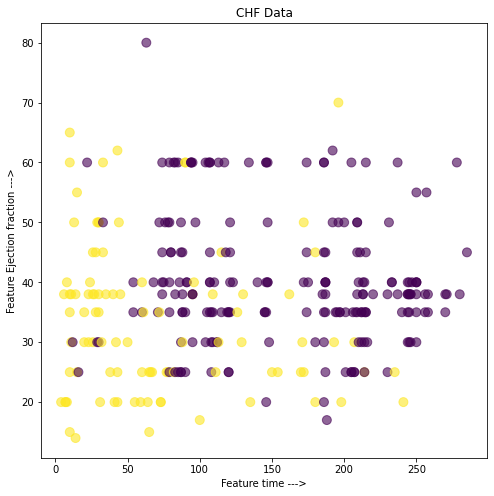

In [12]:
# plot group by colors
plt.figure(figsize=(8,8))
plt.scatter(X['time'],X['ejection_fraction'],c=y,s=80,alpha=0.6)
plt.xlabel('Feature time --->')
plt.ylabel('Feature Ejection fraction --->')
plt.title('CHF Data')

Platelets value are high range value and too high compare to the other values

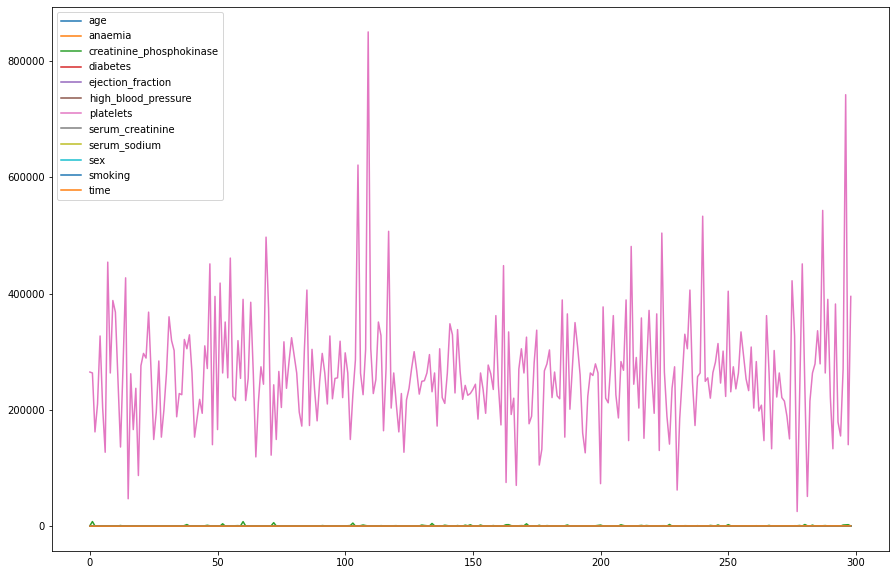

In [13]:
X.plot(figsize=(15, 10))

Normalization datasets

In [14]:
from sklearn.preprocessing import MinMaxScaler
data = X.values
scaler = MinMaxScaler()
x = scaler.fit_transform(data)
x[:5]     

array([[0.63636364, 0.        , 0.07131921, 0.        , 0.09090909,
        1.        , 0.29082313, 0.15730337, 0.48571429, 1.        ,
        0.        , 0.        ],
       [0.27272727, 0.        , 1.        , 0.        , 0.36363636,
        0.        , 0.28883262, 0.06741573, 0.65714286, 1.        ,
        0.        , 0.00711744],
       [0.45454545, 0.        , 0.01569278, 0.        , 0.09090909,
        0.        , 0.16595951, 0.08988764, 0.45714286, 1.        ,
        1.        , 0.01067616],
       [0.18181818, 1.        , 0.01122735, 0.        , 0.09090909,
        0.        , 0.22414838, 0.15730337, 0.68571429, 1.        ,
        0.        , 0.01067616],
       [0.45454545, 1.        , 0.01747895, 1.        , 0.09090909,
        0.        , 0.36598376, 0.24719101, 0.08571429, 0.        ,
        0.        , 0.01423488]])

In [15]:
X = pd.DataFrame(x,columns=df.columns[:-1])
X.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,0.636364,0.0,0.071319,0.0,0.090909,1.0,0.290823,0.157303,0.485714,1.0,0.0,0.000000
1,0.272727,0.0,1.000000,0.0,0.363636,0.0,0.288833,0.067416,0.657143,1.0,0.0,0.007117
2,0.454545,0.0,0.015693,0.0,0.090909,0.0,0.165960,0.089888,0.457143,1.0,1.0,0.010676
3,0.181818,1.0,0.011227,0.0,0.090909,0.0,0.224148,0.157303,0.685714,1.0,0.0,0.010676
4,0.454545,1.0,0.017479,1.0,0.090909,0.0,0.365984,0.247191,0.085714,0.0,0.0,0.014235


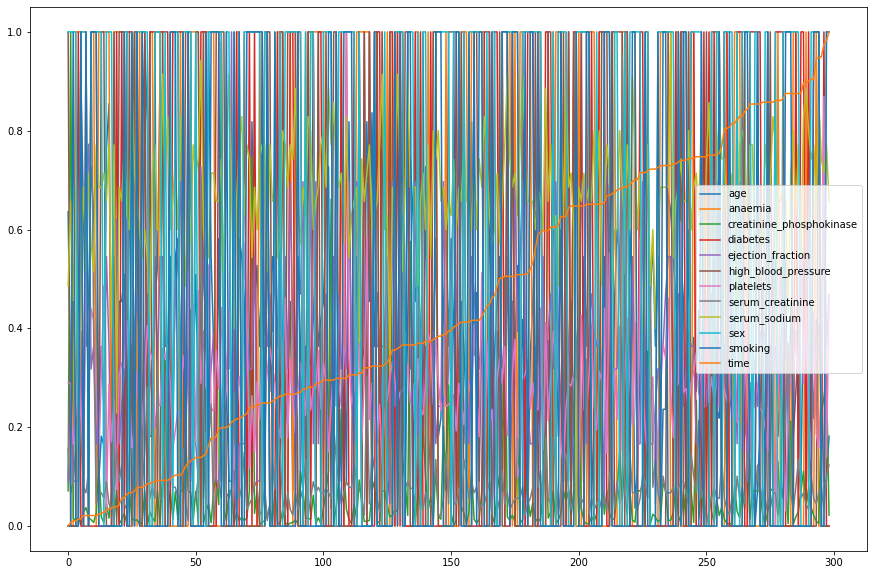

In [16]:
X.plot(figsize=(15,10))

In [17]:
#Spliting data 20% as test / 80% as training
from sklearn.model_selection import train_test_split
seed = 6536115
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=seed)
print(X_train.shape,
X_test.shape,
y_train.shape,
y_test.shape)

(239, 12) (60, 12) (239,) (60,)


## 3) Create an adaptive boosting classifier with decision tree and SVM by using a python sklearnpackage.

### DecisionTreeClassifier

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
#tuning find the best paramter by GridSearchCV
from sklearn.model_selection import GridSearchCV
# Set the parameters by cross-validation
tuned_parameters = {'max_depth':[i for i in range(2,11,1)],
                    'min_samples_leaf':[i for i in range(2,11,1)]}

# scores = ['accuracy','f1']
from sklearn.metrics import make_scorer, accuracy_score, f1_score, precision_score, recall_score,classification_report,confusion_matrix

scores = {'accuracy': make_scorer(accuracy_score),
          'f1': make_scorer(f1_score)}

In [20]:
for score in scores:
  print("# Tuning hyper-parameters for %s" % score)
  print()

  clf = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0), cv = 10, param_grid=tuned_parameters, verbose=1, scoring=score)
  clf.fit(X_train, y_train)
  
  print("Best parameters set found on development set:",score,clf.best_params_)
  print("Grid scores on development set:")
  print()
  means = clf.cv_results_['mean_test_score']
  stds = clf.cv_results_['std_test_score']
  for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std* 2, params))
  print()

# Tuning hyper-parameters for accuracy

Fitting 10 folds for each of 81 candidates, totalling 810 fits
Best parameters set found on development set: accuracy {'max_depth': 2, 'min_samples_leaf': 2}
Grid scores on development set:

0.836 (+/-0.142) for {'max_depth': 2, 'min_samples_leaf': 2}
0.836 (+/-0.142) for {'max_depth': 2, 'min_samples_leaf': 3}
0.836 (+/-0.142) for {'max_depth': 2, 'min_samples_leaf': 4}
0.836 (+/-0.142) for {'max_depth': 2, 'min_samples_leaf': 5}
0.836 (+/-0.142) for {'max_depth': 2, 'min_samples_leaf': 6}
0.836 (+/-0.142) for {'max_depth': 2, 'min_samples_leaf': 7}
0.836 (+/-0.142) for {'max_depth': 2, 'min_samples_leaf': 8}
0.836 (+/-0.142) for {'max_depth': 2, 'min_samples_leaf': 9}
0.836 (+/-0.142) for {'max_depth': 2, 'min_samples_leaf': 10}
0.803 (+/-0.129) for {'max_depth': 3, 'min_samples_leaf': 2}
0.812 (+/-0.135) for {'max_depth': 3, 'min_samples_leaf': 3}
0.812 (+/-0.135) for {'max_depth': 3, 'min_samples_leaf': 4}
0.812 (+/-0.135) for {'max_depth': 3

In [23]:
# print best parameter after tuning
print("Best Score:", clf.best_score_,"using",clf.best_params_)
# print how our model looks after hyper-parameter tuning
print(clf.best_estimator_)

Best Score: 0.7400443510737629 using {'max_depth': 3, 'min_samples_leaf': 10}
DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, random_state=0)


#### Calculate score before using adaboost

In [24]:
# create model using max_depth = 3 and min_samples_leaf = 10  from tune summary tune
grid_predictions = clf.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test, grid_predictions))

[[29 13]
 [ 4 14]]
              precision    recall  f1-score   support

           0       0.88      0.69      0.77        42
           1       0.52      0.78      0.62        18

    accuracy                           0.72        60
   macro avg       0.70      0.73      0.70        60
weighted avg       0.77      0.72      0.73        60



Max accuracy [0.8666666666666667, 19]


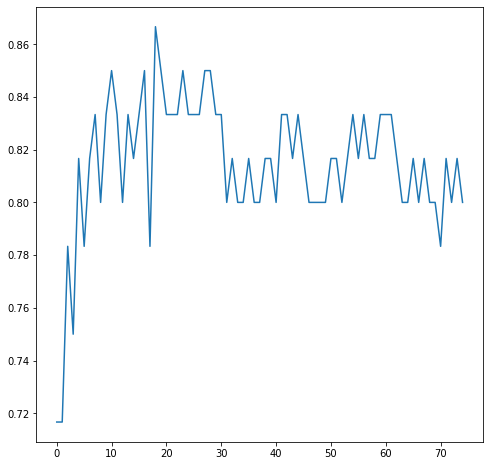

In [25]:
accuracyAll = []
maxacc = [0,0]
for i in range(75):
  
  bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3, random_state=0),algorithm="SAMME",n_estimators=i+1, random_state=0, learning_rate=1.0)
  bdt.fit(X_train, y_train)

  y_pred = bdt.predict(X_test) 
  confusion = confusion_matrix(y_test,y_pred)
  
  accuracy = accuracy_score(y_test, y_pred)
  accuracyAll.append(accuracy)
  if(accuracy > maxacc[0]):
    maxacc[0] = accuracy
    maxacc[1] = i+1
  
print('Max accuracy',maxacc)
plt.figure(figsize=(8,8))
plt.plot(accuracyAll)

In [26]:
preds = np.stack([tree.predict(X_test.to_numpy()) for tree in bdt.estimators_])

iteration 19 provide highest score for accuracy and f1 score.

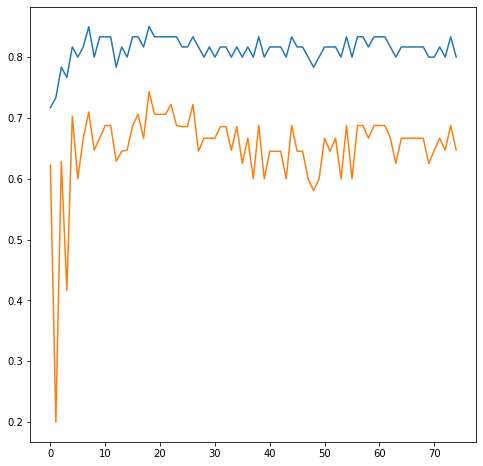

In [27]:
import scipy.stats as stats
plt.figure(figsize=(8,8))
plt.plot([accuracy_score(y_test,stats.mode(preds[:i+1],axis=0).mode[0]) for i in range(75)])
plt.plot([f1_score(y_test,stats.mode(preds[:i+1],axis=0).mode[0]) for i in range(75)])

In [28]:
from sklearn.tree import DecisionTreeClassifier
# Create and fit an AdaBoosteddecision tree
AdaDecision = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),algorithm="SAMME",n_estimators=19, random_state=0, learning_rate=1.0)
AdaDecision.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(max_depth=3),
                   n_estimators=19, random_state=0)

#### Report score for Decision tree + Adaboost

In [29]:
y_predDtree = AdaDecision.predict(X_test) 
confusionDtree = confusion_matrix(y_test,y_predDtree)

print('Confusion Matrix of Decision tree + Adaboost : \n', confusionDtree)
print(classification_report(y_test, y_predDtree))

Confusion Matrix of Decision tree + Adaboost : 
 [[39  3]
 [ 5 13]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91        42
           1       0.81      0.72      0.76        18

    accuracy                           0.87        60
   macro avg       0.85      0.83      0.84        60
weighted avg       0.86      0.87      0.86        60



### SVM

In [30]:
from sklearn import svm
clf = svm.LinearSVC()

In [31]:
#tuning find the best paramter by GridSearchCV
from sklearn.model_selection import GridSearchCV
# Set the parameters by cross-validation
tuned_parameters = {'C': [100,0.001, 0.10, 0.1, 1, 10, 25, 50, 100, 1000], 'gamma': [1,0.1,0.01,0.001, 1e-4, 1e-5]}

# scores = ['accuracy','f1']
from sklearn.metrics import make_scorer, accuracy_score, f1_score, precision_score, recall_score,classification_report,confusion_matrix

scores = {'accuracy': make_scorer(accuracy_score),
          'f1': make_scorer(f1_score)}

In [32]:
for score in scores:
  print("# Tuning hyper-parameters for %s" % score)
  print()

  clf = GridSearchCV(estimator=svm.SVC(), cv = 10, param_grid=tuned_parameters, verbose=1, scoring=score)
  clf.fit(X_train, y_train)

  print("Best parameters set found on development set:",score,clf.best_params_)
  print()
  print("Grid scores on development set:")
  print()
  means = clf.cv_results_['mean_test_score']
  stds = clf.cv_results_['std_test_score']
  for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std* 2, params))
  print()

# Tuning hyper-parameters for accuracy

Fitting 10 folds for each of 60 candidates, totalling 600 fits
Best parameters set found on development set: accuracy {'C': 50, 'gamma': 0.01}

Grid scores on development set:

0.682 (+/-0.146) for {'C': 100, 'gamma': 1}
0.791 (+/-0.099) for {'C': 100, 'gamma': 0.1}
0.841 (+/-0.084) for {'C': 100, 'gamma': 0.01}
0.770 (+/-0.099) for {'C': 100, 'gamma': 0.001}
0.674 (+/-0.029) for {'C': 100, 'gamma': 0.0001}
0.674 (+/-0.029) for {'C': 100, 'gamma': 1e-05}
0.674 (+/-0.029) for {'C': 0.001, 'gamma': 1}
0.674 (+/-0.029) for {'C': 0.001, 'gamma': 0.1}
0.674 (+/-0.029) for {'C': 0.001, 'gamma': 0.01}
0.674 (+/-0.029) for {'C': 0.001, 'gamma': 0.001}
0.674 (+/-0.029) for {'C': 0.001, 'gamma': 0.0001}
0.674 (+/-0.029) for {'C': 0.001, 'gamma': 1e-05}
0.674 (+/-0.029) for {'C': 0.1, 'gamma': 1}
0.674 (+/-0.029) for {'C': 0.1, 'gamma': 0.1}
0.674 (+/-0.029) for {'C': 0.1, 'gamma': 0.01}
0.674 (+/-0.029) for {'C': 0.1, 'gamma': 0.001}
0.674 (+/-0.029) for {

In [33]:
# print best parameter after tuning
print("Best Score:", clf.best_score_,"using",clf.best_params_)
# print how our model looks after hyper-parameter tuning
print(clf.best_estimator_)

Best Score: 0.7454573367808661 using {'C': 50, 'gamma': 0.01}
SVC(C=50, gamma=0.01)


#### Calculate score before using adaboost

In [34]:
# create model linearSVC using C=50, gamma=0.01 from tune summary tune
grid_predictions = clf.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test, grid_predictions))

[[40  2]
 [ 9  9]]
              precision    recall  f1-score   support

           0       0.82      0.95      0.88        42
           1       0.82      0.50      0.62        18

    accuracy                           0.82        60
   macro avg       0.82      0.73      0.75        60
weighted avg       0.82      0.82      0.80        60



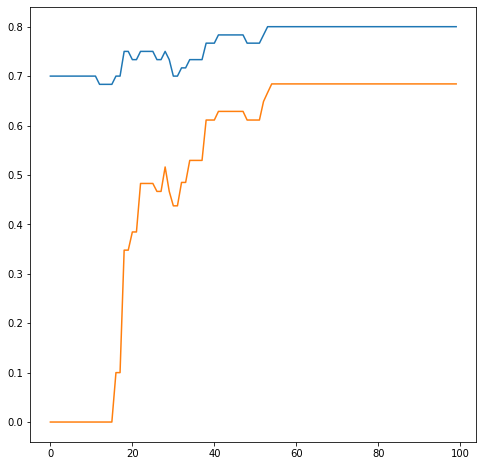

In [35]:
import scipy.stats as stats
bdt = AdaBoostClassifier(svm.LinearSVC(),algorithm="SAMME",n_estimators=100, random_state=0, learning_rate=0.1)
bdt.fit(X_train, y_train)

preds = np.stack([tree.predict(X_test.to_numpy()) for tree in bdt.estimators_])

plt.figure(figsize=(8,8))
plt.plot([accuracy_score(y_test,stats.mode(preds[:i+1],axis=0).mode[0]) for i in range(100)])
plt.plot([f1_score(y_test,stats.mode(preds[:i+1],axis=0).mode[0]) for i in range(100)])

In [36]:
bdt = AdaBoostClassifier(svm.LinearSVC(),algorithm="SAMME",n_estimators=60, random_state=0, learning_rate=1.0)
bdt.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME', base_estimator=LinearSVC(),
                   n_estimators=60, random_state=0)

#### Report score for SVM + Adaboost  
score does not differ significantly from svm alone.


In [37]:
y_predSVM = bdt.predict(X_test) 
confusionSVM = confusion_matrix(y_test,y_predSVM)

print('Confusion Matrix SVM + Adaboost: \n', confusionSVM)
print(classification_report(y_test, y_predSVM))

Confusion Matrix SVM + Adaboost: 
 [[38  4]
 [ 8 10]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.86        42
           1       0.71      0.56      0.63        18

    accuracy                           0.80        60
   macro avg       0.77      0.73      0.74        60
weighted avg       0.79      0.80      0.79        60



## 4) Compare the performance between these two models by using appropriate metrics (e.g. accuracy, F1,….). 


Because of dataset congestive hearth failure motality is an imbalance class. we should focus on F1 score mainly. The F1 score of Decision tree + Adaboost is imporve a lot compare with use Decision tree alone and get score in death(0.76) and alive(0.91) prediction higher than SVM pure (D = 0.62, A = 0.88), SVM + Adaboost (D = 0.63, A = 0.86).   
Moreover, accuarcy of Decision tree + Adaboost(0.87) is higher than SVM pure (0.82), SVM + Adaboost (0.80) too. Then model Decision tree + Adaboost is better.

In [38]:
y_predDtree = AdaDecision.predict(X_test) 
confusionDtree = confusion_matrix(y_test,y_predDtree)

print('Confusion Matrix of Decision tree + Adaboost : \n', confusionDtree)
print(classification_report(y_test, y_predDtree))

Confusion Matrix of Decision tree + Adaboost : 
 [[39  3]
 [ 5 13]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91        42
           1       0.81      0.72      0.76        18

    accuracy                           0.87        60
   macro avg       0.85      0.83      0.84        60
weighted avg       0.86      0.87      0.86        60



## 5) Choose the best model and give your strong reasons for why should you choose it.

### $\color{green} {Discussion}$

from CHF datasets is an imbalance class(should focus on F1score mainly). from this experiment use Adaboost combine with Decision tree and SVM to predict motality and survival from this analysis we should select the best model  Adaboots with Decision Tree Classifier. Because it gets f1 score = 91% for survival prediciton and 76% for motality prediction, accuracy = 87% at n_estimator = 19 which all parameter score are higher compare to other model.
However, Adaboots with SVM get f1 score = 86%, accuracy = 80% at n_estimator = 60. both score from SVM with or without Adaboost is nearly the same and lower than Adaboots with Decision Tree Classifier.